In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

End date:  2017-08-23


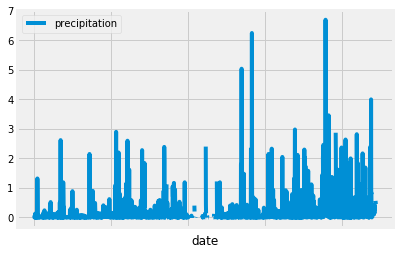

In [10]:
#define function "precipitation"
def precipitation():

    # get information about Table "Measurement"
    my_measurement=session.query(Measurement)
    #for items in my_measurement:
    #    print(items.date, items.prcp, items.station)

    #inspector = inspect(engine)
    #columns_in_M = inspector.get_columns('Measurement')
    #for c in columns_in_M:
    #    print(c['name'], c['type'])
    
    #columns_in_S = inspector.get_columns('Station')
    #for c in columns_in_S:
    #    print(c['name'], c['type'])
    
    # Design a query to retrieve the last 12 months of precipitation data and plot the results

    # Latest Date in the table
    Latest_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
    query_end_date=Latest_Date
    print(f"End date: ", query_end_date)

    #query_end_date = session.query(Measurement.date).all()[-1][0]

    # Calculate the date 1 year ago from the last data point in the database
    query_start_date = dt.datetime.strptime(query_end_date, "%Y-%m-%d") - dt.timedelta(days=365)

    # Perform a query to retrieve the data and precipitation scores
    #print("----------------Perform a query to retrieve the data from start date to end date-----------")
    query_result=session.query(Measurement.date, Measurement.prcp).\
        filter(Measurement.date > query_start_date).\
        filter(Measurement.date <= query_end_date).all()

    # Save the query results as a Pandas DataFrame and set the index to the date column
    precipitation_df = pd.DataFrame(query_result, columns=['date', 'precipitation'])
    precipitation_df.set_index('date', inplace=True)
    #print(precipitation_df.head())

    # Sort the dataframe by date
    result1 = precipitation_df.sort_index(ascending=True)
    #print(result1.head())

    # Use Pandas Plotting with Matplotlib to plot the data
    precipitation_df.plot()
    #plt.tight_layout()
    plt.show()

    return precipitation_df

#make the function call
result_df = precipitation()

![precipitation](Images/precipitation.png)

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
result_df.describe()

,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


![describe](Images/describe.png)

In [12]:
# get information about Table "Station"
#columns_in_S = inspector.get_columns('Station')
#for i in columns_in_S:
#    print(i['name'], i['type'])

# Design a query to show how many stations are available in this dataset?   
my_station=session.query(Station)


########### alternative solution ################
#total_station_number = 0

#for items in my_station:
    
#    total_station_number = total_station_number + 1
    
#    print(items.id, items.station, items.name)
#print("There are ", total_station_number, " stations available in this dataset")
#################################################

total_station_number = my_station.distinct().count()
print("There are ", total_station_number, " stations available in this dataset")


There are  9  stations available in this dataset


In [13]:
#define function "station"
def station():
    
    # What are the most active stations? (i.e. what stations have the most rows)?
    # List the stations and the counts in descending order.

    #station_list=[]
    #for items in my_station:
    #    station_list.append(items.station)
    #print(station_list)       

    #same_station = session.query(*sel).filter(Measurement.station == Station.station).limit(10).all()
    #print(same_station)  

    #active_stations=session.query(Station.name, Station.station, func.count(Measurement.id)).\
    #    filter(Measurement.station == Station.station).\
    #    group_by(Station.name, Station.station).order_by(func.count(Measurement.id).desc())

    most_active_stations_in_desc_order = session.query(Station.station, func.count(Measurement.id)).\
        filter(Measurement.station == Station.station).\
        group_by(Station.station).order_by(func.count(Measurement.id).desc())
    
    for item in most_active_stations_in_desc_order :
        print(item)
        
    #get the list of station names ONLY
    most_active_stations_in_desc_order_2 = session.query(Station.station).\
        filter(Measurement.station == Station.station).\
        group_by(Station.station).order_by(func.count(Measurement.id).desc())
    
    list_of_stations=[]
    
    for item in most_active_stations_in_desc_order_2 :
        list_of_stations.append(item)
        
    print(list_of_stations)

    return list_of_stations

result_list_of_stations = station()

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)
[('USC00519281',), ('USC00519397',), ('USC00513117',), ('USC00519523',), ('USC00516128',), ('USC00514830',), ('USC00511918',), ('USC00517948',), ('USC00518838',)]


In [14]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
def min_avg_max():
    most_active_station_1 = result_list_of_stations[0][0]

    station_temperatures = session.query(func.max(Measurement.tobs),\
                                     func.min(Measurement.tobs),\
                                     func.avg(Measurement.tobs)).\
                        filter(Measurement.station == most_active_station_1).all()

    for item in station_temperatures:
        print(item)
        
min_avg_max()

(85.0, 54.0, 71.66378066378067)


USC00519281
End date:  2017-08-23


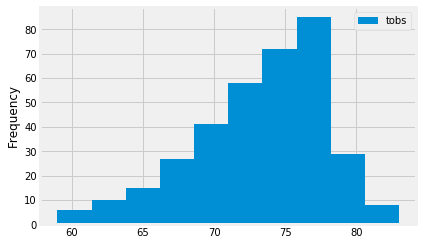

In [15]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
def tobs():
    most_active_station_2 = result_list_of_stations[0][0]
    print(most_active_station_2)
    
    
    # Latest Date in the table
    Latest_Date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()[0]
    query_end_date=Latest_Date
    print(f"End date: ", query_end_date)
    # Calculate the date 1 year ago from the last data point in the database
    query_start_date = dt.datetime.strptime(query_end_date, "%Y-%m-%d") - dt.timedelta(days=365)
    
    
    tob_query_result=session.query(Measurement.date, Measurement.tobs).\
        filter(Measurement.station == most_active_station_2).\
        filter(Measurement.date > query_start_date).\
        filter(Measurement.date <= query_end_date).all()

    # Save the query results as a Pandas DataFrame and set the index to the date column
    tob_df = pd.DataFrame(tob_query_result, columns=['date', 'tobs'])
    tob_df.set_index('date', inplace=True)
    #print(tob_df.head())

    # Sort the dataframe by date
    sorted_tob_df = tob_df.sort_index(ascending=True)
    #print(sorted_tob_df.head())
    

    # Use Pandas Plotting with Matplotlib to plot the data
    tob_df.plot(kind="hist")
    #plt.tight_layout()
    plt.show()
    
    return sorted_tob_df
    
result_tob_list=tobs()

![precipitation](Images/station-histogram.png)

In [16]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [17]:
def min_avg_max():
    
    # Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
    # for your trip using the previous year's data for those same dates.

    my_trip_start_date = '2013-02-28'
    my_trip_end_date = '2013-03-05'

    query_trip_start_date = dt.datetime.strptime(my_trip_start_date, "%Y-%m-%d") - dt.timedelta(days=366)
    query_trip_end_date = dt.datetime.strptime(my_trip_end_date, "%Y-%m-%d") - dt.timedelta(days=365)

    #print(query_trip_start_date, query_trip_end_date)

    exp_temps = calc_temps(query_trip_start_date, query_trip_end_date)
    min_temp = exp_temps[0][0]
    avg_temp = exp_temps[0][1]
    max_temp = exp_temps[0][2]

    print(min_temp, avg_temp, max_temp)

    return exp_temps[0]

result_min_avg_max = min_avg_max()

62.0 69.4375 74.0


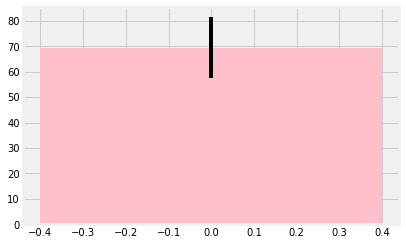

In [19]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

min_temp = result_min_avg_max[0]
avg_temp = result_min_avg_max[1]
max_temp = result_min_avg_max[2]

yerror = max_temp - min_temp

barvalue = [avg_temp]
xvals = range(len(barvalue))

fig,ax = plt.subplots()
ax.bar(xvals, barvalue, yerr=yerror, color='pink')
plt.show()

In [21]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

my_trip_start_date = '2013-02-28'
my_trip_end_date = '2013-03-05'

query_trip_start_date = dt.datetime.strptime(my_trip_start_date, "%Y-%m-%d") - dt.timedelta(days=366)
query_trip_end_date = dt.datetime.strptime(my_trip_end_date, "%Y-%m-%d") - dt.timedelta(days=365)

rainfall_per_station = session.query(Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation, func.avg(Measurement.prcp)).\
                    filter(Measurement.station == Station.station).\
                    filter(Measurement.date >= query_trip_start_date).\
                    filter(Measurement.date <= query_trip_end_date).\
            group_by(Station.station).order_by(func.avg(Measurement.prcp)).all()

for item in rainfall_per_station:
    print(item)


('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, None)
('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.0)
('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9, 0.12666666666666668)
('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.19666666666666668)
('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.48666666666666664)
('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6, 0.9600000000000001)
('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.965)
('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 1.6533333333333333)
('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 1.8383333333333336)


## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
